# 最急降下法

## データ準備

In [5]:
import pandas as pd
df = pd.read_csv('sample_data.csv')

In [6]:
df

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


## データの可視化

In [7]:
import seaborn as sns

<AxesSubplot:xlabel='space', ylabel='rent'>

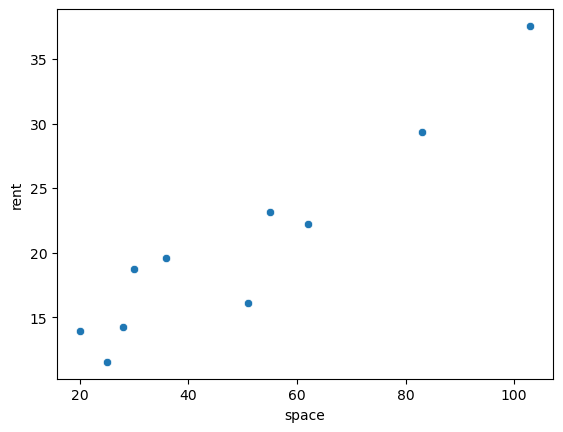

In [8]:
sns.scatterplot(x='space', y='rent', data=df)

## 損失関数定義

In [100]:
import numpy as np

# numpy array how to use
x = df['space'].values
y = df['rent'].values

def cost_func(theta_0, theta_1, x, y):
    return np.mean(np.square(y - (theta_0 + theta_1 * x)))

cost_func(5, 7, x, y)

138703.20244638805

## 損失関数の描画

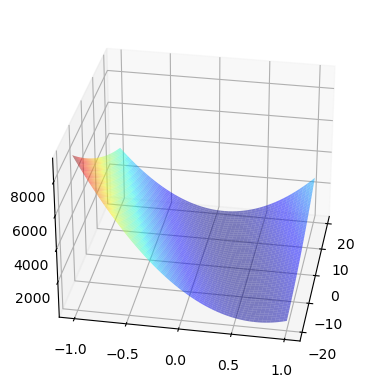

In [101]:
import matplotlib.pyplot as plt
from itertools import product

# 軸の値の数
n0 = n1 = 300

# それぞれのパラメータθの最小値と最大値
min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1

# 軸の値設定
theta_0 = np.linspace(min_0, max_0, n0)
theta_1 = np.linspace(min_1, max_1, n1)
# plot_surface用に2次元にする
theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)
z = [cost_func(param[0], param[1], x=x, y=y) for param in list(product(theta_0, theta_1))]
# plot_surface用に2次元にする
Z = np.array(z).reshape(n0, n1)

ax = plt.axes(projection='3d')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

In [89]:
x = np.array([1, 2, 3, 4])
y = np.array([10, 20, 30, 40])
X, Y = np.meshgrid(x, y)
print(X)
print(Y)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[10 10 10 10]
 [20 20 20 20]
 [30 30 30 30]
 [40 40 40 40]]


In [90]:

z = [x*y for x, y in product(x, y)]
Z = np.array(z).reshape(4, 4)
Z

array([[ 10,  20,  30,  40],
       [ 20,  40,  60,  80],
       [ 30,  60,  90, 120],
       [ 40,  80, 120, 160]])

In [91]:
X = np.array([[1, 2, 3, 4,],
             [1, 2, 3, 4,],
             [1, 2, 3, 4,],
             [1, 2, 3, 4,]])
Y = np.array([[10, 10, 10, 10],
             [20, 20, 20, 20],
             [30, 30, 30, 30],
             [40, 40, 40, 40]])
Z = np.array([[10, 20, 30, 40],
             [20, 40, 60, 80],
             [30, 60, 90, 120],
             [40, 80, 120, 160]])

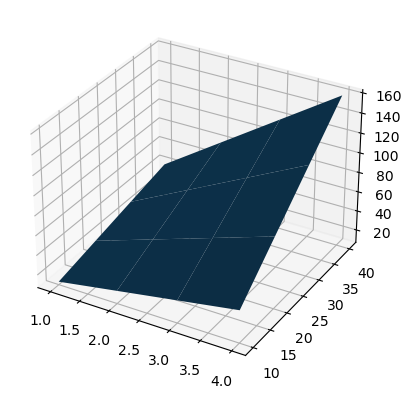

In [92]:
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')
ax.plot_surface(X.T, Y.T, Z)

## 最急降下法

In [126]:
# theta_0_init = np.random.uniform(min_0, max_0)
# theta_1_init = np.random.uniform(max_1, max_1)

theta_0_init = -5
theta_1_init = -0.5

def update_theta_0(theta_0, theta_1, x, y, alpha=0.05):
    return theta_0 - alpha * 2 * np.mean((theta_0 + theta_1 * x) - y)

def update_theta_1(theta_0, theta_1, x, y, alpha=0.05):
    return theta_1 - alpha * 2 * np.mean(((theta_0 + theta_1 * x) - y) * x)

epochs = 100000
alpha = 0.00005

theta_0_hist = []
theta_1_hist = []
# 初期化
theta_0_hist.append(theta_0_init)
theta_1_hist.append(theta_1_init)

for _ in range(epochs):
    updated_theta_0 = update_theta0(theta_0_hist[-1], theta_1_hist[-1], x=x, y=y, alpha=alpha)
    updated_theta_1 = update_theta1(theta_0_hist[-1], theta_1_hist[-1], x=x, y=y, alpha=alpha)
    theta_0_hist.append(updated_theta_0)
    theta_1_hist.append(updated_theta_1)

In [134]:
print(theta_0_hist[-1])
print(theta_1_hist[-1])

5.692313583745944
0.2972194648547114


## 結果の描画

In [137]:
cost_hist = [cost_func(*param, x=x, y=y)for param in zip(theta_0_hist, theta_1_hist)]

## 3D描画

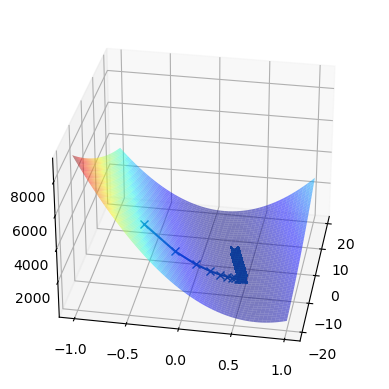

In [149]:
ax = plt.axes(projection='3d')
ax.plot(theta_0_hist, theta_1_hist, cost_hist, 'x-')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

## 等高線

Text(0, 0.5, 'theta 0')

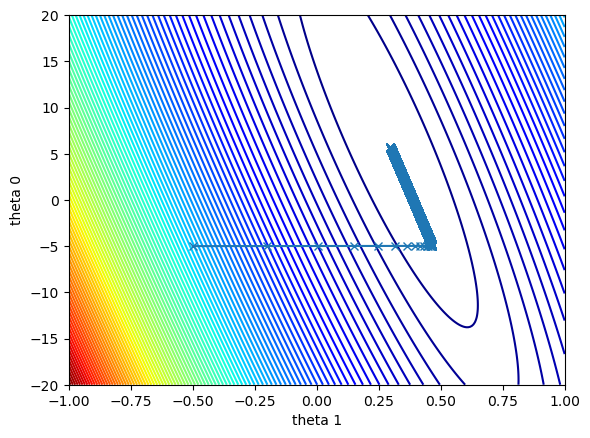

In [154]:
plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap='jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')
plt.xlabel('theta 1')
plt.ylabel('theta 0')

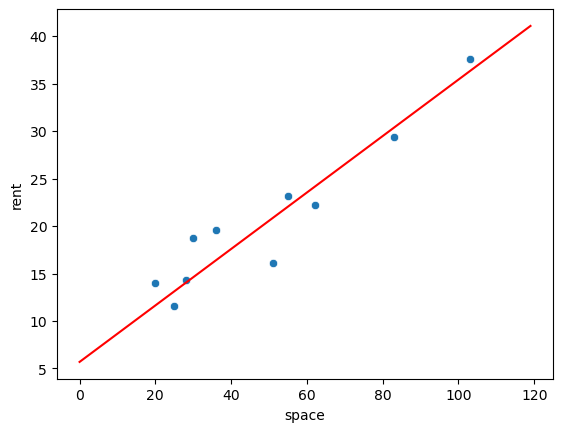

In [160]:
sns.scatterplot(x='space', y='rent', data=df)
x_values=np.arange(120)
y_values=theta_0_hist[-1] + theta_1_hist[-1]*x_values
plt.plot(x_values, y_values, '-', color='r')

## 正規方程式

In [164]:
x

array([ 20,  25,  28,  30,  36,  51,  55,  62,  83, 103])

In [165]:
y

array([13.9588237 , 11.53380496, 14.26954729, 18.7226796 , 19.60267397,
       16.06816636, 23.18359859, 22.21259504, 29.35701011, 37.56512884])

In [166]:
df

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


In [172]:
X = np.vstack([np.ones(len(x)), x]).T

In [173]:
X

array([[  1.,  20.],
       [  1.,  25.],
       [  1.,  28.],
       [  1.,  30.],
       [  1.,  36.],
       [  1.,  51.],
       [  1.,  55.],
       [  1.,  62.],
       [  1.,  83.],
       [  1., 103.]])

In [182]:
# θ = (XT(転置)X) ^-1 XT(転置)y

best_theta = np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y.T)

In [183]:
best_theta

array([7.0962325 , 0.27487161])

In [184]:
print(theta_0_hist[-1])
print(theta_1_hist[-1])

5.692313583745944
0.2972194648547114


Text(0, 0.5, 'theta 0')

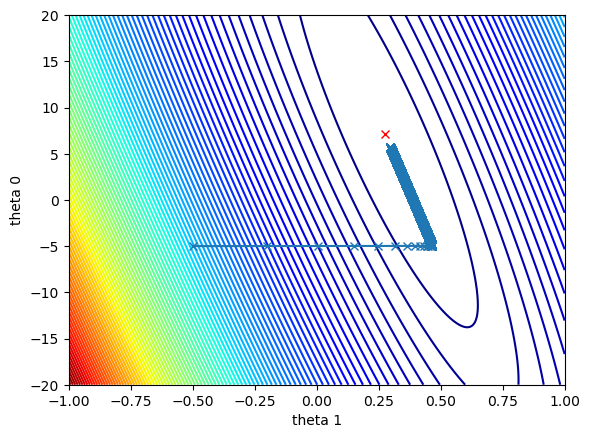

In [185]:
plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap='jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')
plt.plot(best_theta[1], best_theta[0], 'x', color='red')
plt.xlabel('theta 1')
plt.ylabel('theta 0')

## 線形回帰のライブラリ scikit-learnで線形回帰

In [187]:
from sklearn.linear_model import LinearRegression

In [192]:
## インスタンス化
model = LinearRegression()

In [193]:
model

LinearRegression()

In [194]:
df.head()

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674


In [213]:
## データの準備　
x = df['space'].values
y = df['rent'].values
print(x)
X = x.reshape(-1, 1)
print(X)

[ 20  25  28  30  36  51  55  62  83 103]
[[ 20]
 [ 25]
 [ 28]
 [ 30]
 [ 36]
 [ 51]
 [ 55]
 [ 62]
 [ 83]
 [103]]


In [214]:
# インスタンス生成
# fitで学習
# predictで予想

model.fit(X, y)

LinearRegression()

In [215]:
model.predict(X)

array([12.59366469, 13.96802274, 14.79263756, 15.34238078, 16.99161044,
       21.11468458, 22.21417102, 24.13827229, 29.91057608, 35.40800827])

In [219]:
# 係数
model.coef_

array([0.27487161])

In [221]:
# 切片
model.intercept_

7.0962324999088295

In [222]:
# 最急降下法の最小二乗法
best_theta

array([7.0962325 , 0.27487161])